In [ ]:
import numpy as np
import scipy
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages  # to save multiple figs to single pdf

In [3]:
dir = '/Users/alyssaatwood/Dropbox/Obs_datasets/'    # change this to the path where you downloaded the netcdf file: GPCP_precip_mon_mean.nc

In [4]:
# Open the netcdf file with xarray:
#   Note about decode_times in xarray:  
#     If True, decode times encoded in the standard NetCDF datetime format into datetime objects. Otherwise, leave 
#     them encoded as numbers. This is a just personal preference, and depends on how you want to handle time formats.

ds = xr.open_dataset(dir+'GPCP_precip_mon_mean.nc',decode_times=False)
print(ds)
pr = ds['precip'][0:408,:,:]      # time x lat x lon (units = mm/day); time(0:407) = 1/1979 - 12/2012 from GPCP version 2.2
lat = ds['lat'][:]    
lon = ds['lon'][:]    
nt, nlat, nlon = pr.shape

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 416)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) float64 6.538e+04 6.541e+04 ... 7.798e+04 7.801e+04
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    Conventions:      COARDS
    title:            GPCP Version 2.2 Combined Precipitation Dataset (Final)
    history:          Wed Aug  1 13:41:59 2012: ncatted -O -a comments,global...
    platform:         Observation
    source:           GPCP Polar Satellite Precipitation Data Centre - Emissi...
    documentation:    http://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    version:          V2.2
    references:       http://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html
    comments:         Please redownload if you obtained this file before Aug ...
    Acknowledgement:  \n,Please cite the original source o

In [5]:
# One option is to convert the DataArray "pr" to a numpy array for array manipulations
pr_tavg = np.average(pr[:,:,:],axis=0)            # average over all time

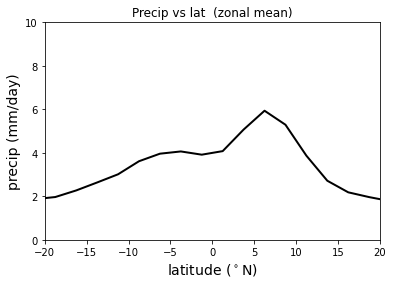

In [6]:
pp = PdfPages('precip_gpcp_zonalmean.pdf')   # to save multiple figs to single pdf

# Plot1: Zonal avg precip vs lat (mean annual)
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.plot(lat, np.average(pr_tavg,axis=1), linewidth=2.0, c='black')
plt.xlabel('latitude ($^\circ$N)',fontsize=14)
plt.ylabel('precip (mm/day)',fontsize=14)
plt.xlim(-20,20.)
plt.ylim(0.,10.)
handles, labels = ax1.get_legend_handles_labels()
plt.title('Precip vs lat  (zonal mean)')
pp.savefig(bbox_inches='tight')      # saves the figs to a file, using the file type defined above for pp

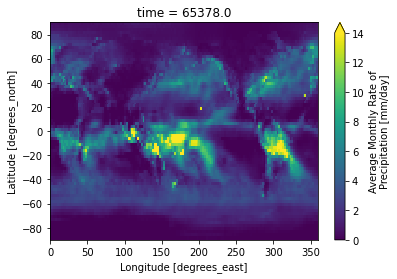

In [9]:
# Alternatively, you can keep the data in the form of a DataArray in xarray:
ds.precip[0,:,:].plot(vmin=0, vmax=14)        # plots only the first time index of precip

<xarray.DataArray 'precip' (lat: 72, lon: 144)>
array([[0.46762538, 0.47242162, 0.4606712 , ..., 0.4519609 , 0.46515158,
        0.46109447],
       [0.43931687, 0.4489083 , 0.44820127, ..., 0.436689  , 0.44626734,
        0.44379073],
       [0.48885125, 0.48799887, 0.48344892, ..., 0.4789949 , 0.47302395,
        0.47420928],
       ...,
       [0.15989082, 0.15917505, 0.1374743 , ..., 0.18072824, 0.18490064,
        0.17502603],
       [0.2036573 , 0.20782699, 0.19581005, ..., 0.20352161, 0.21355034,
        0.20838706],
       [0.30247158, 0.29886618, 0.2906807 , ..., 0.30617896, 0.32077923,
        0.32729602]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8


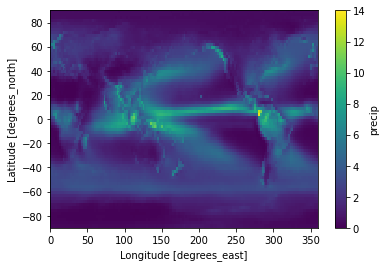

In [8]:
# Now calculate and plot the time-averaged precip, and save the plot to an eps file

pp = PdfPages('precip_gpcp_map.eps')   # eps files can be open in Adobe Illustrator and preserves layers

pr_tavg = pr.mean(axis=0)            # average over all time (using a DataArray)
print(pr_tavg)                       # print the DataArray to the screen

pr_tavg.plot(vmin=0, vmax=14)        # plot the data
pp.savefig(bbox_inches='tight')      # save the figs to a file, using the file type defined above for pp
pp.close()                           # need to close multi-page pdf when finished